<a href="https://colab.research.google.com/github/deepakk177/Project-1/blob/main/Soft_Computing_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soft Computing Lab - 4**

1. Write a Python program to implement ANN with Backpropagation Learning Algorithm.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.5
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.5
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def forward_pass(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a1, a2

def backward_pass(X, y, a1, a2, W2):
    m = X.shape[0]

    # Output layer gradients
    dz2 = a2 - y
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.mean(dz2, axis=0, keepdims=True)

    # Hidden layer gradients
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.mean(dz1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2

def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

def calculate_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def train_network(X, y, epochs, learning_rate):
    input_size = X.shape[1]
    hidden_size = 4
    output_size = y.shape[1]

    W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)
    losses = []

    for epoch in range(epochs):
        # Forward pass
        a1, a2 = forward_pass(X, W1, b1, W2, b2)

        # Calculate loss
        loss = calculate_loss(y, a2)
        losses.append(loss)

        # Backward pass
        dW1, db1, dW2, db2 = backward_pass(X, y, a1, a2, W2)

        # Update weights
        W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if (epoch + 1) % (epochs // 10) == 0 or epochs <= 10:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}")

    return W1, b1, W2, b2, losses

2. Write a program for XOR gate using backpropagation (3 binary inputs → 1 output). Use sigmoid activation, learning rate=0.1, epochs=10. Draw error vs epoch graph.

XOR Truth Table:
A | B | C | Output
------------------
0 | 0 | 0 |   0
0 | 0 | 1 |   1
0 | 1 | 0 |   1
0 | 1 | 1 |   0
1 | 0 | 0 |   1
1 | 0 | 1 |   0
1 | 1 | 0 |   0
1 | 1 | 1 |   1

Training XOR Network...
Learning Rate: 0.1, Epochs: 10
Epoch 1/10, Loss: 0.254309
Epoch 2/10, Loss: 0.253877
Epoch 3/10, Loss: 0.253489
Epoch 4/10, Loss: 0.253140
Epoch 5/10, Loss: 0.252827
Epoch 6/10, Loss: 0.252546
Epoch 7/10, Loss: 0.252293
Epoch 8/10, Loss: 0.252067
Epoch 9/10, Loss: 0.251863
Epoch 10/10, Loss: 0.251680

XOR Results:
Input -> Predicted -> Actual
[np.int64(0), np.int64(0), np.int64(0)] -> 0.4564 -> 0
[np.int64(0), np.int64(0), np.int64(1)] -> 0.4724 -> 1
[np.int64(0), np.int64(1), np.int64(0)] -> 0.4781 -> 1
[np.int64(0), np.int64(1), np.int64(1)] -> 0.4930 -> 0
[np.int64(1), np.int64(0), np.int64(0)] -> 0.4320 -> 1
[np.int64(1), np.int64(0), np.int64(1)] -> 0.4473 -> 0
[np.int64(1), np.int64(1), np.int64(0)] -> 0.4529 -> 0
[np.int64(1), np.int64(1), np.int64(1)] -> 0.4689 -> 1
Accurac

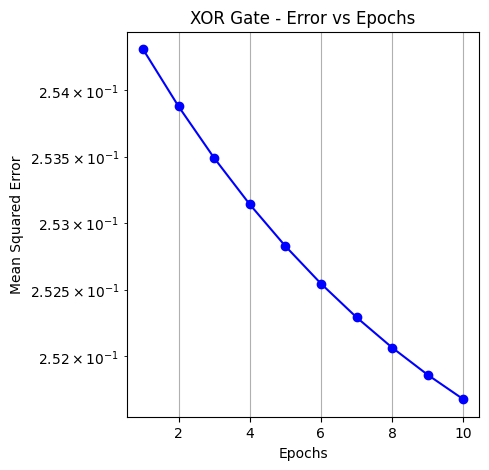

In [2]:
# XOR dataset for 3 inputs
X_xor = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                  [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)

y_xor = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

print("XOR Truth Table:")
print("A | B | C | Output")
print("-" * 18)
for i in range(len(X_xor)):
    print(f"{int(X_xor[i,0])} | {int(X_xor[i,1])} | {int(X_xor[i,2])} |   {int(y_xor[i,0])}")

# Train XOR network
print("\nTraining XOR Network...")
print("Learning Rate: 0.1, Epochs: 10")

W1_xor, b1_xor, W2_xor, b2_xor, losses_xor = train_network(X_xor, y_xor, epochs=10, learning_rate=0.1)

# Test predictions
print("\nXOR Results:")
_, predictions_xor = forward_pass(X_xor, W1_xor, b1_xor, W2_xor, b2_xor)

print("Input -> Predicted -> Actual")
for i in range(len(X_xor)):
    pred = predictions_xor[i, 0]
    actual = y_xor[i, 0]
    print(f"{list(X_xor[i].astype(int))} -> {pred:.4f} -> {actual:.0f}")

# Calculate accuracy
binary_predictions = (predictions_xor > 0.5).astype(int)
accuracy = np.mean(binary_predictions == y_xor)
print(f"Accuracy: {accuracy:.1%}")

# Plot error curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(losses_xor) + 1), losses_xor, 'b-o')
plt.title('XOR Gate - Error vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.yscale('log')

print()


3. Build ANN with 5 input features, 3 hidden layers (10,7,5 neurons), and 1 output neuron. Generate random dataset (100 samples). Target: binary (sum(features)>2.5). Train with sigmoid activation, learning rate=0.1, epochs=100. Draw error vs epoch graph.

Dataset Generated:
Samples: 100, Features: 5
Target: Binary (sum > 2.5)
Positive class: 48, Negative class: 52

Training Complex Network...
Architecture: 5 -> 10 -> 7 -> 5 -> 1
Learning Rate: 0.1, Epochs: 100
Epoch 10/100, Loss: 0.250251
Epoch 20/100, Loss: 0.249826
Epoch 30/100, Loss: 0.249674
Epoch 40/100, Loss: 0.249620
Epoch 50/100, Loss: 0.249600
Epoch 60/100, Loss: 0.249592
Epoch 70/100, Loss: 0.249588
Epoch 80/100, Loss: 0.249586
Epoch 90/100, Loss: 0.249584
Epoch 100/100, Loss: 0.249583

Results:
Final Accuracy: 52.0%
Final Loss: 0.249583

Sample Predictions:
Sum: 2.81 -> Pred: 0.4802 -> Actual: 1
Sum: 2.39 -> Pred: 0.4800 -> Actual: 0
Sum: 2.22 -> Pred: 0.4802 -> Actual: 0
Sum: 1.74 -> Pred: 0.4800 -> Actual: 0
Sum: 1.87 -> Pred: 0.4799 -> Actual: 0


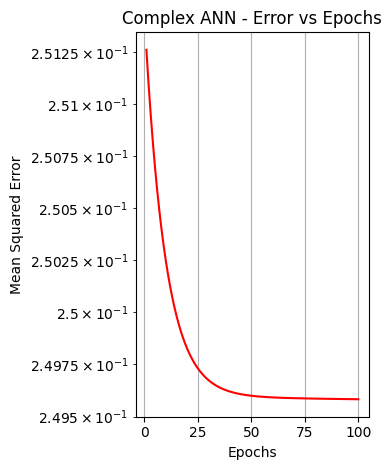

In [3]:
def initialize_complex_weights():
    W1 = np.random.randn(5, 10) * 0.3
    b1 = np.zeros((1, 10))
    W2 = np.random.randn(10, 7) * 0.3
    b2 = np.zeros((1, 7))
    W3 = np.random.randn(7, 5) * 0.3
    b3 = np.zeros((1, 5))
    W4 = np.random.randn(5, 1) * 0.3
    b4 = np.zeros((1, 1))
    return W1, b1, W2, b2, W3, b3, W4, b4

def forward_complex(X, W1, b1, W2, b2, W3, b3, W4, b4):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)
    z4 = np.dot(a3, W4) + b4
    a4 = sigmoid(z4)
    return a1, a2, a3, a4

def backward_complex(X, y, a1, a2, a3, a4, W2, W3, W4):
    m = X.shape[0]

    # Output layer
    dz4 = a4 - y
    dW4 = np.dot(a3.T, dz4) / m
    db4 = np.mean(dz4, axis=0, keepdims=True)

    # Third hidden layer
    dz3 = np.dot(dz4, W4.T) * sigmoid_derivative(a3)
    dW3 = np.dot(a2.T, dz3) / m
    db3 = np.mean(dz3, axis=0, keepdims=True)

    # Second hidden layer
    dz2 = np.dot(dz3, W3.T) * sigmoid_derivative(a2)
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.mean(dz2, axis=0, keepdims=True)

    # First hidden layer
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.mean(dz1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3, dW4, db4

def train_complex_network(X, y, epochs, learning_rate):
    W1, b1, W2, b2, W3, b3, W4, b4 = initialize_complex_weights()
    losses = []

    for epoch in range(epochs):
        # Forward pass
        a1, a2, a3, a4 = forward_complex(X, W1, b1, W2, b2, W3, b3, W4, b4)

        # Calculate loss
        loss = calculate_loss(y, a4)
        losses.append(loss)

        # Backward pass
        dW1, db1, dW2, db2, dW3, db3, dW4, db4 = backward_complex(X, y, a1, a2, a3, a4, W2, W3, W4)

        # Update weights
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3
        W4 -= learning_rate * dW4
        b4 -= learning_rate * db4

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}")

    return W1, b1, W2, b2, W3, b3, W4, b4, losses

# Generate random dataset
np.random.seed(42)
X_complex = np.random.rand(100, 5)
feature_sums = np.sum(X_complex, axis=1)
y_complex = (feature_sums > 2.5).astype(np.float32).reshape(-1, 1)

print("Dataset Generated:")
print(f"Samples: 100, Features: 5")
print(f"Target: Binary (sum > 2.5)")
print(f"Positive class: {int(np.sum(y_complex))}, Negative class: {int(100 - np.sum(y_complex))}")

# Train complex network
print("\nTraining Complex Network...")
print("Architecture: 5 -> 10 -> 7 -> 5 -> 1")
print("Learning Rate: 0.1, Epochs: 100")

W1_c, b1_c, W2_c, b2_c, W3_c, b3_c, W4_c, b4_c, losses_complex = train_complex_network(
    X_complex, y_complex, epochs=100, learning_rate=0.1)

# Evaluate
_, _, _, predictions_complex = forward_complex(X_complex, W1_c, b1_c, W2_c, b2_c, W3_c, b3_c, W4_c, b4_c)
binary_pred_complex = (predictions_complex > 0.5).astype(int)
accuracy_complex = np.mean(binary_pred_complex == y_complex)

print(f"\nResults:")
print(f"Final Accuracy: {accuracy_complex:.1%}")
print(f"Final Loss: {losses_complex[-1]:.6f}")

print("\nSample Predictions:")
for i in range(5):
    sum_feat = np.sum(X_complex[i])
    pred = predictions_complex[i, 0]
    actual = y_complex[i, 0]
    print(f"Sum: {sum_feat:.2f} -> Pred: {pred:.4f} -> Actual: {actual:.0f}")

# Plot error curve
plt.subplot(1, 2, 2)
plt.plot(range(1, len(losses_complex) + 1), losses_complex, 'r-')
plt.title('Complex ANN - Error vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.show()